In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

In [7]:
import os
os.chdir("C:/Users/USER/Documents/my_DS_projects/UNSUPERVISED/credit-fear-clustering")
print("Current Directory:", os.getcwd())

Current Directory: C:\Users\USER\Documents\my_DS_projects\UNSUPERVISED\credit-fear-clustering


In [8]:
# Load Data
df = pd.read_csv("SCFP2019.csv")

# Display basic information
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (28885, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


# Explore

In [9]:
# Filter households that are credit fearful
mask = df['TURNFEAR'] == 1
df_fear = df[mask]
print("Credit-Fearful Households Shape:", df_fear.shape)

Credit-Fearful Households Shape: (4623, 356)


## Age Analysis

In [10]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear['AGECL'].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head()

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (4623,)


5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

In [61]:
# Age group mapping
agecl_dict = {
    1: "Under 35", 2: "35-44", 3: "45-54",
    4: "55-64", 5: "65-74", 6: "75 or Older"
}

df_fear = df_fear.copy()  # Ensure df_fear is a separate DataFrame
df_fear['AGE_GROUP'] = df_fear['AGECL'].replace(agecl_dict)

print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (4623, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,AGE_GROUP
5,2,21,3790.476607,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
6,2,22,3798.868505,1,50,3,8,2,1,3,...,2,1,2,1,1,4,3,2,2,45-54
7,2,23,3799.468393,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
8,2,24,3788.076005,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
9,2,25,3793.066589,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54


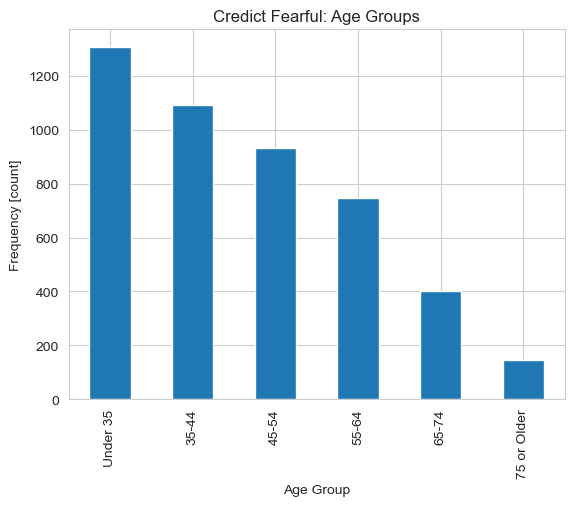

In [11]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(
    kind = 'bar',
    xlabel = 'Age Group',
    ylabel = 'Frequency [count]',
    title = 'Credict Fearful: Age Groups'
);

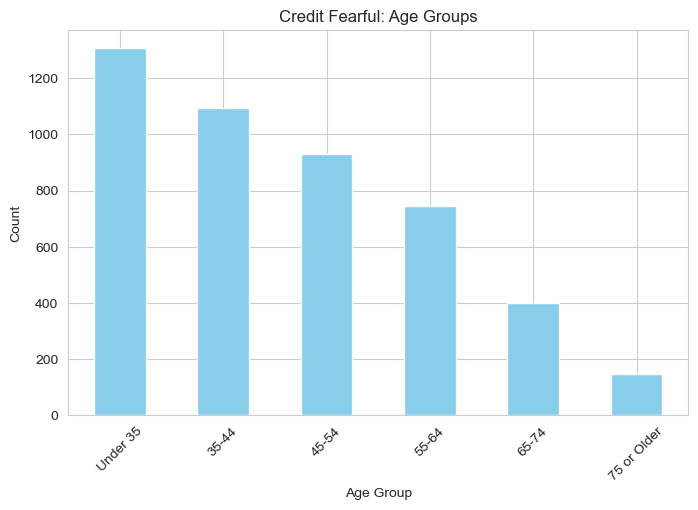

In [62]:
# Age group distribution
plt.figure(figsize=(8,5))
df_fear['AGE_GROUP'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Credit Fearful: Age Groups")
plt.xticks(rotation=45)
plt.show()

Our chart is telling us that many of the people who fear being denied credit are younger. 

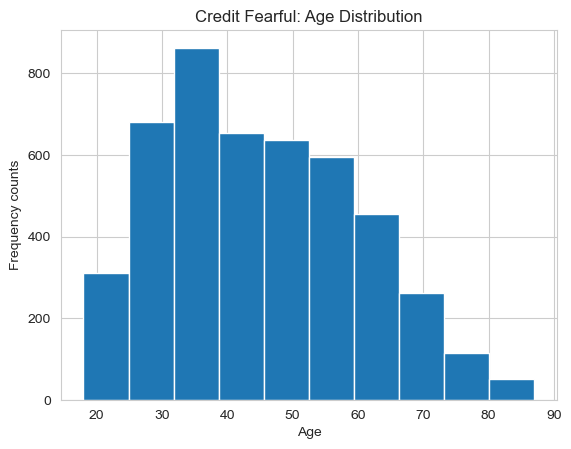

In [12]:
# Plot histogram of "AGE"
df_fear['AGE'].hist(bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency counts')
plt.title('Credit Fearful: Age Distribution');

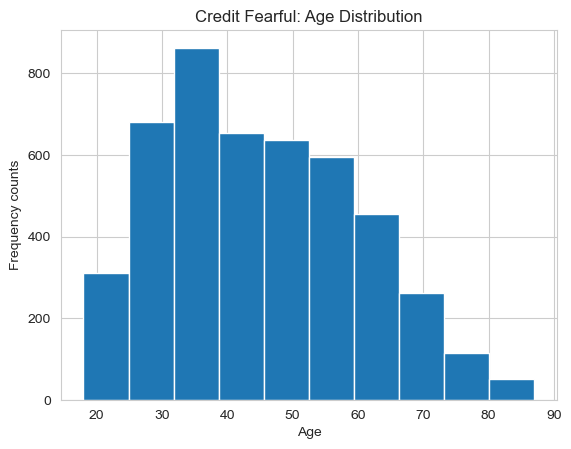

In [63]:
# Plot histogram of "AGE"
df_fear['AGE'].hist(bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency counts')
plt.title('Credit Fearful: Age Distribution');

It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are most concerned seem to be between 30 and 40

## RACE Analysis

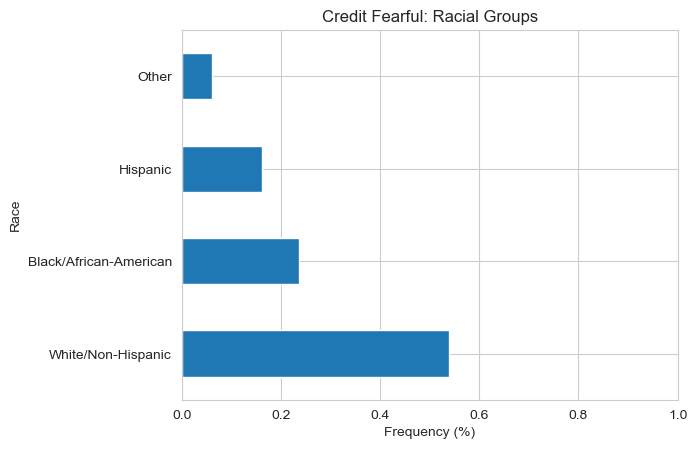

In [13]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = 'barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

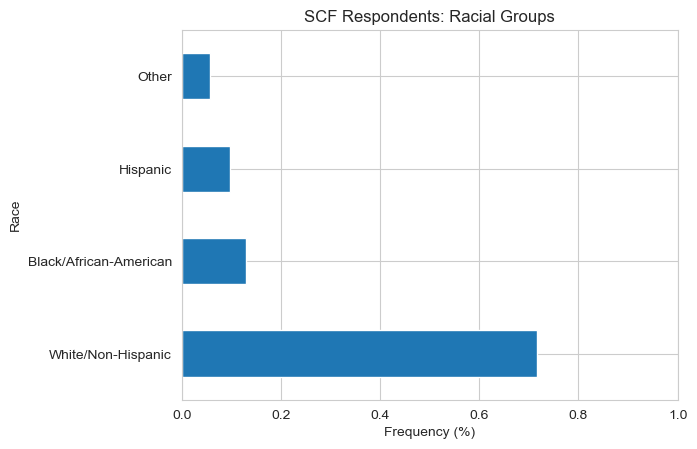

In [14]:
race = df['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = 'barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

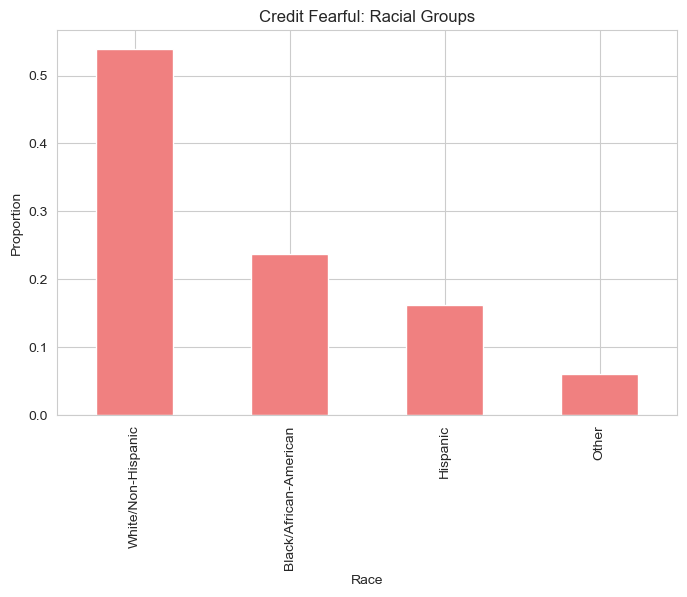

In [64]:
race_dict = {1: "White/Non-Hispanic", 2: "Black/African-American", 3: "Hispanic", 5: "Other"}
df_fear['RACE_GROUP'] = df_fear['RACE'].replace(race_dict)

plt.figure(figsize=(8,5))
df_fear['RACE_GROUP'].value_counts(normalize=True).plot(kind='bar', color='lightcoral')
plt.xlabel("Race")
plt.ylabel("Proportion")
plt.title("Credit Fearful: Racial Groups")
plt.show()

### Recreate the  bar chart i just made, but this time use the entire dataset df instead of the subset df_fear

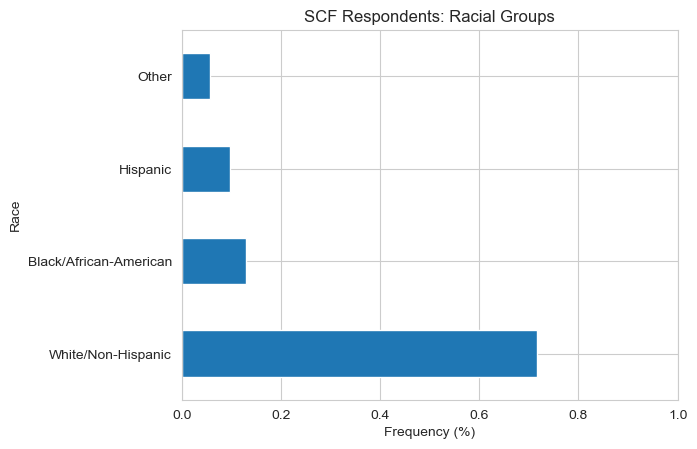

In [65]:
race = df['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = 'barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

## Income

In [15]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df['INCCAT']
    .replace(inccat_dict)
    .groupby(df['TURNFEAR'])
    .value_counts(normalize = True)
    .rename('frequency')
    .to_frame()
    .reset_index()
)

print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


In [66]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df['INCCAT']
    .replace(inccat_dict)
    .groupby(df['TURNFEAR'])
    .value_counts(normalize = True)
    .rename('frequency')
    .to_frame()
    .reset_index()
)

print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


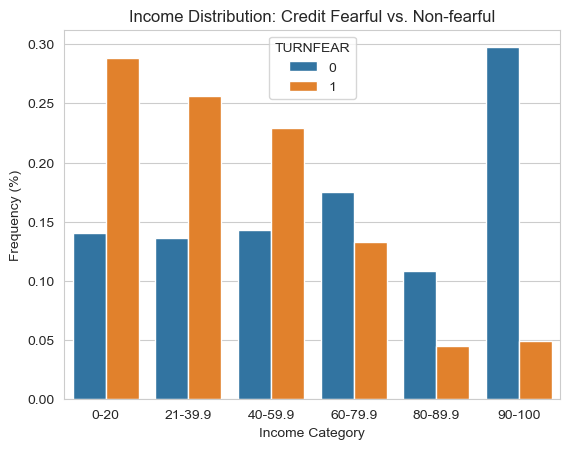

In [67]:
# Create bar chart of `df_inccat`
sns.barplot(
    x = 'INCCAT',
    y = 'frequency',
    hue = 'TURNFEAR',
    data = df_inccat,
    order = inccat_dict.values()
    
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes.

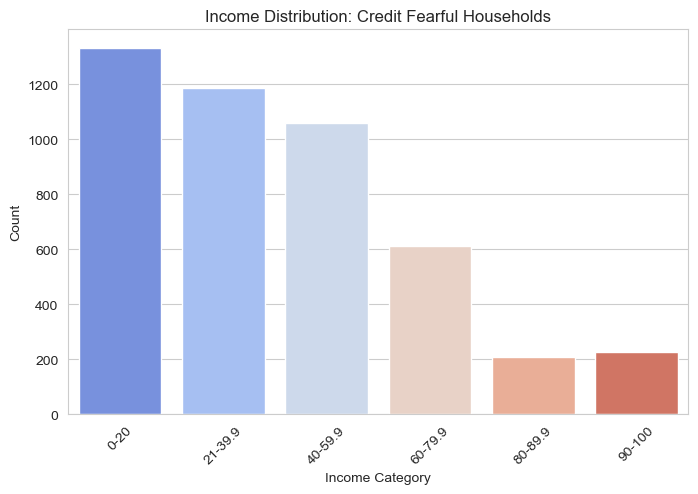

In [68]:
inccat_dict = {
    1: "0-20", 2: "21-39.9", 3: "40-59.9", 4: "60-79.9", 5: "80-89.9", 6: "90-100"
}
df_fear['INCOME_CATEGORY'] = df_fear['INCCAT'].replace(inccat_dict)

plt.figure(figsize=(8,5))
sns.countplot(x='INCOME_CATEGORY', data=df_fear, order=inccat_dict.values(), palette='coolwarm')
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.title("Income Distribution: Credit Fearful Households")
plt.xticks(rotation=45)
plt.show()

## ASSET

In [69]:
asset_house_corr = df['ASSET'].corr(df['HOUSES'])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544793153


That's a moderate positive correlation, which we would probably expect, right? 

In [70]:
asset_house_corr = df_fear['ASSET'].corr(df_fear['HOUSES'])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735998714


Aha! They're different! It's still only a moderate positive correlation, but the relationship between the total value of assets and the value of the primary residence is stronger for our TURNFEAR group than it is for the population as a whole

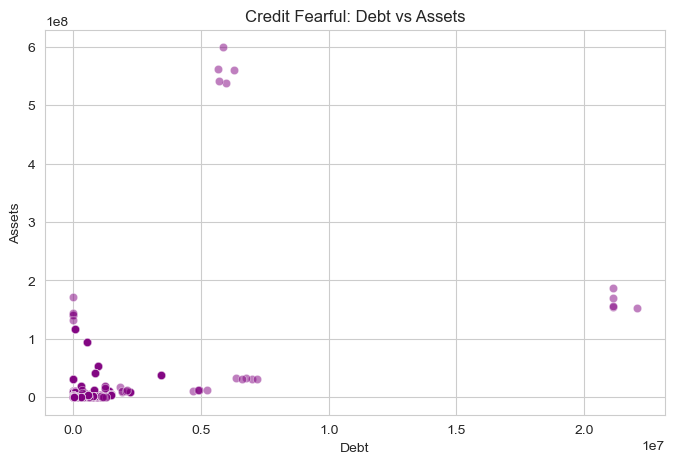

In [71]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_fear['DEBT'], y=df_fear['ASSET'], alpha=0.5, color='purple')
plt.xlabel("Debt")
plt.ylabel("Assets")
plt.title("Credit Fearful: Debt vs Assets")
plt.show()

## Education Analysis

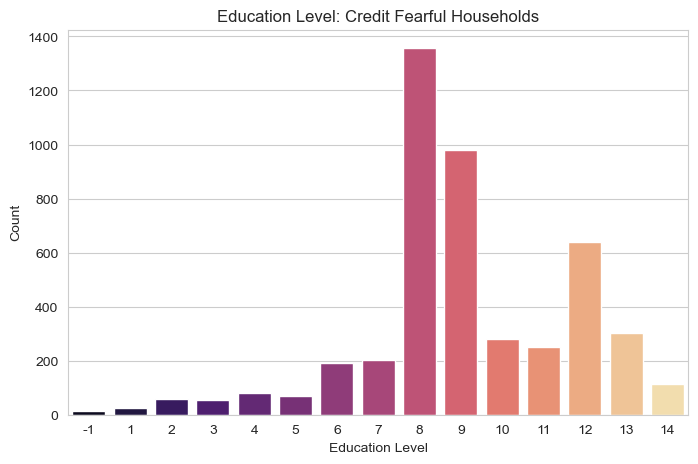

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(x='EDUC', data=df_fear, palette='magma')
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level: Credit Fearful Households")
plt.show()

In [73]:
df_educ = (
    df['EDUC']
    .groupby(df['TURNFEAR'])
    .value_counts(normalize = True)
    .rename('frequency')
    .to_frame()
    .reset_index()
)
print("df_educ type:", type(df_educ))
print("df_educ shape:", df_educ.shape)
df_educ.head()

df_educ type: <class 'pandas.core.frame.DataFrame'>
df_educ shape: (30, 3)


,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117


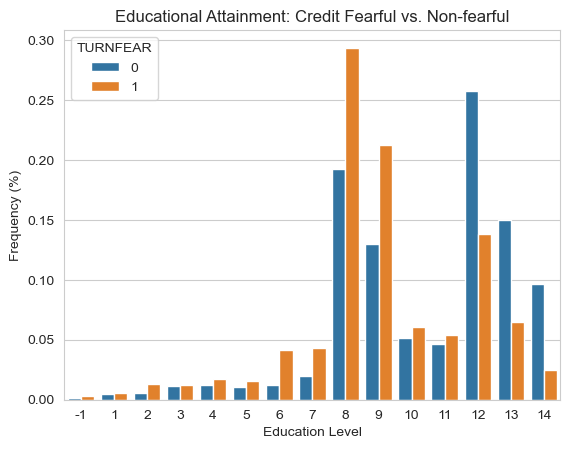

In [74]:
# Create bar chart of `df_educ`
sns.barplot(
    x = 'EDUC',
    y = 'frequency',
    hue = 'TURNFEAR',
    data = df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In this plot, we can see that a much higher proportion of credit-fearful respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.

## Debt Analysis

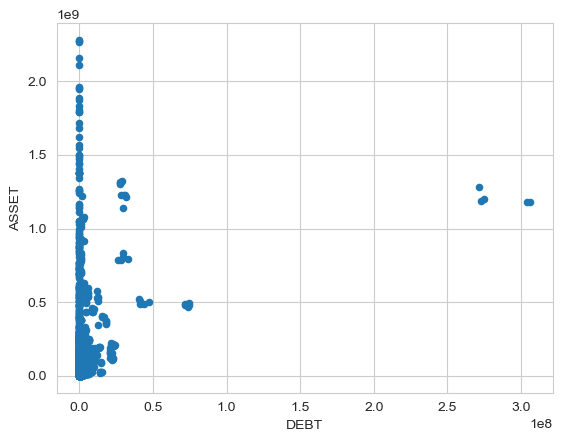

In [75]:
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x = 'DEBT', y = 'ASSET');

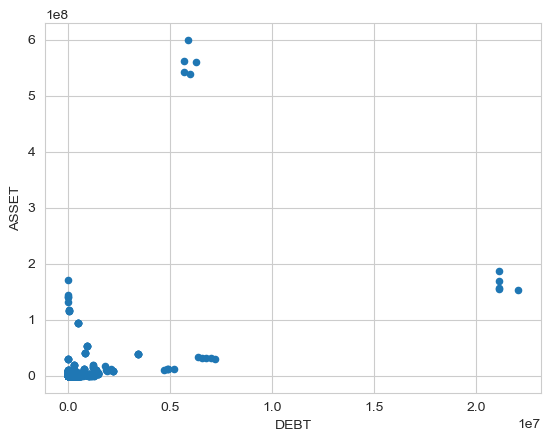

In [76]:
# Create scatter plot of ASSET vs DEBT, df
df_fear.plot.scatter(x = 'DEBT', y = 'ASSET');

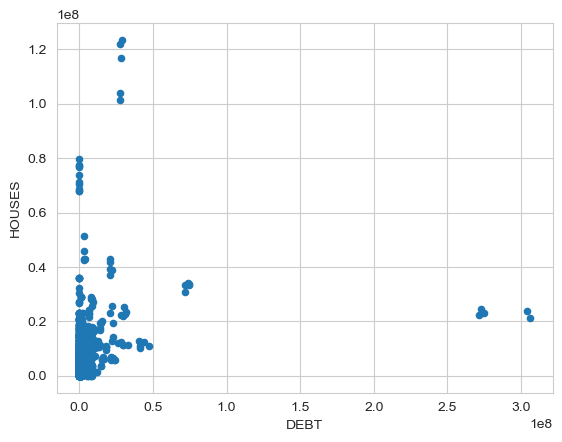

In [77]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x = 'DEBT', y = 'HOUSES');

## Correlation Matrix

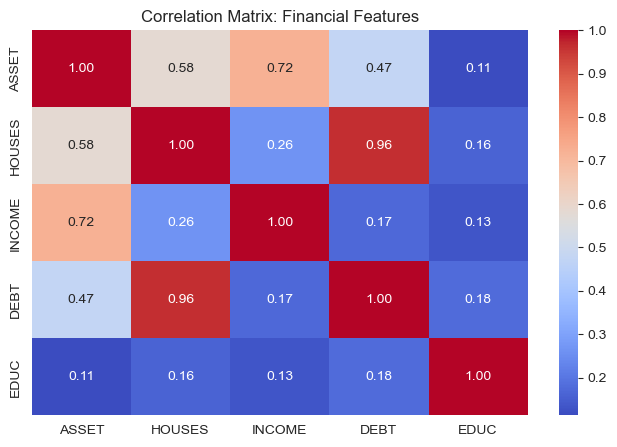

In [78]:
# Correlation matrix for fearful house hold
selected_cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr_matrix = df_fear[selected_cols].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Financial Features")
plt.show()

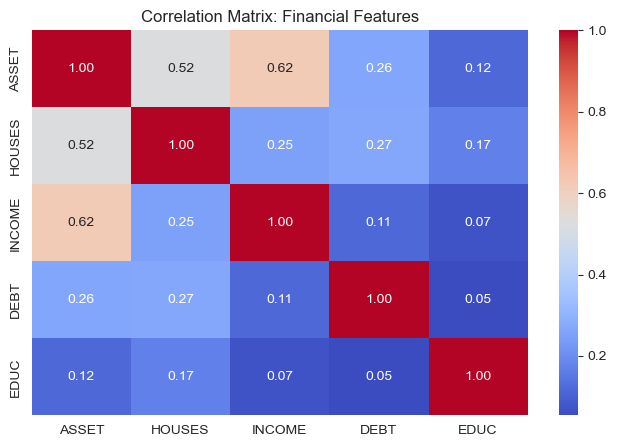

In [79]:
# Correlatio analysis for non credit fearful

selected_cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr_matrix = df[selected_cols].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Financial Features")
plt.show()

Whoa! There are some pretty important differences here! The relationship between "DEBT" and "HOUSES" is positive for both datasets, but while the coefficient for df is fairly weak at 0.26, the same number for df_fear is 0.96.

# CLustering

In [16]:
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import plotly.express as px

In [17]:
def wrangle(filepath):
    # Read file into dataframe
    df = pd.read_csv(filepath)
    mask = (df['TURNFEAR'] == 1) & (df['NETWORTH'] < 2e6)
    df = df[mask]
    return df

In [21]:
df = wrangle("SCFP2019.csv")

print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (4407, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


Due to the very high number of features we have in our dataset the features to use for the cluster analysis might be a problem. One way to choose the best features for clustering is to determine which numerical features have the largest variance. 

In [22]:
# Calculate variance, get 10 largest features
top_ten_var = df.var().sort_values().tail(10)

print("top_ten_var type:", type(top_ten_var))
print("top_ten_var shape:", top_ten_var.shape)
top_ten_var

top_ten_var type: <class 'pandas.core.series.Series'>
top_ten_var shape: (10,)


PLOAN1      1.508048e+10
ACTBUS      1.677175e+10
BUS         1.683586e+10
KGTOTAL     1.801415e+10
DEBT        2.457563e+10
HOUSES      3.025930e+10
NHNFIN      3.958070e+10
NETWORTH    5.446911e+10
NFIN        7.370790e+10
ASSET       9.864096e+10
dtype: float64

In [24]:
# Create horizontal bar chart of `top_ten_var`
fig = px.bar(
    x = top_ten_var,
    y = top_ten_var.index,
    title = 'SCF: High Variance Features'
    
)
fig.update_layout(xaxis_title = 'Variance', yaxis_title = 'Features')
fig.show()

In [25]:
# Create a boxplot of `NHNFIN`
fig = px.box(
    data_frame = df,
    x = 'NHNFIN',
    title = 'Distribution of Non-home, Non-Financial Assets'
)
fig.update_layout(xaxis_title = 'Value ($)')
fig.show()

The dataset is massively right-skewed because of the huge outliers on the right side of the distribution. Even though we already excluded households with a high net worth with our wrangle function, the variance is still being distorted by some extreme outliers.
The best way to deal with this is to look at the trimmed variance, where we remove extreme values before calculating variance.

In [26]:
# Calculate trimmed variance
top_ten_trim_var = df.apply(trimmed_var, limits = (0.1, 0.1)).sort_values().tail(10)

print("top_ten_trim_var type:", type(top_ten_trim_var))
print("top_ten_trim_var shape:", top_ten_trim_var.shape)
top_ten_trim_var

top_ten_trim_var type: <class 'pandas.core.series.Series'>
top_ten_trim_var shape: (10,)


WAGEINC     7.415894e+08
HOMEEQ      9.548834e+08
NH_MORT     1.755886e+09
MRTHEL      1.819848e+09
PLOAN1      1.902850e+09
NETWORTH    4.011771e+09
DEBT        4.099576e+09
HOUSES      6.508833e+09
NFIN        1.108097e+10
ASSET       1.530852e+10
dtype: float64

In [27]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
    x = top_ten_trim_var,
    y = top_ten_trim_var.index,
    title = 'SCF: High Variance Features'
)
fig.update_layout(xaxis_title = 'Trimmed Variance', yaxis_title = 'Feature')
fig.show()

Here are three things to notice in this plot. First, the variances have decreased a lot. In our previous chart, the x-axis went up to $80 billion; this one goes up to $12 billion. Second, the top 10 features have changed a bit. All the features relating to business ownership ("...BUS") are gone. Finally, we can see that there are big differences in variance from feature to feature. For example, the variance for "WAGEINC" is around than $500 million, while the variance for "ASSET" is nearly $12 billion. In other words, these features have completely different scales. This is something that we'll need to address before we can make good clusters.

### Generate a list of high variance with their variance name.

In [28]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()

print("high_var_cols type:", type(high_var_cols))
print("high_var_cols len:", len(top_ten_trim_var))
high_var_cols

high_var_cols type: <class 'list'>
high_var_cols len: 10


['NETWORTH', 'DEBT', 'HOUSES', 'NFIN', 'ASSET']

## Split

In [29]:
X = df[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (4407, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
5,-7778.267550,14142.304636,0.0,4520.900662,6364.037086
6,-5459.856954,14605.986755,0.0,7302.993377,9146.129801
7,-9406.950993,17735.841060,0.0,6491.549669,8328.890066
8,-2909.605298,16344.794702,0.0,11592.052980,13435.189404
9,-6624.858278,17851.761589,0.0,9389.562914,11226.903311


# Build model

## Iterate

During our EDA, we saw that we had a scale issue among our features. That issue can make it harder to cluster the data, so we'll need to fix that to help our analysis along. One strategy we can use is standardization, a statistical method for putting all the variables in a dataset on the same scale. 

In [30]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build Model
    model = make_pipeline(StandardScaler(), KMeans(n_clusters = k, n_init = 10, random_state = 42))
    # Train Model
    model.fit(X)
    # Cal Inertia
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    # Cal Silhouette score
    silhouette_scores.append(
        silhouette_score(X, model.named_steps['kmeans'].labels_)
    )

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [10900.236324338819, 7282.155740431511, 5940.004021846663, 5016.284489735256, 4300.181197638107, 3748.060047242459, 3158.7841655225275, 2871.294771925613, 2645.073208496581, 2426.090178032045, 2289.6272923707534]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.7456405015578531, 0.7054175832593965, 0.6884218299913217, 0.6579331021067493, 0.6502914919387532, 0.6530226546586374, 0.6570872685116089, 0.6308001765433737, 0.5705499833730145, 0.5870514197590041, 0.5806437908580178]


### Determining number clusters

In [31]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x = n_clusters, y = inertia_errors, title = 'K-Means Model: Inertia vs Number of CLusters'
)
fig.update_layout(xaxis_title = 'Number of CLusters (k)', yaxis_title = 'Inertial')
fig.show()

We can see that the line starts to flatten out around 4 or 5 clusters.

In [32]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x = n_clusters, y = silhouette_scores, title = 'K-Means Model: Silhouette Score vs Number of Clusters'
)
fig.update_layout(xaxis_title = 'Number of Clusters (k)', yaxis_title = 'Silhouette Score')
fig.show()

This one's a little less straightforward, but we can see that the best silhouette scores occur when there are 3 or 4 clusters.
Putting the information from this plot together with our inertia plot, it seems like the best setting for n_clusters will be 4.

In [37]:
from sklearn.utils.validation import check_is_fitted
# Build model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters = 4, n_init = 10, random_state = 42)
)

# Fit model to data
final_model.fit(X)

# Assert that model has been fit to data
check_is_fitted(final_model)

In [38]:
labels = final_model.named_steps['kmeans'].labels_

print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

labels type: <class 'numpy.ndarray'>
labels len: 4407
[0 0 0 0 0]


In [39]:
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (4, 5)


,NETWORTH,DEBT,HOUSES,NFIN,ASSET
0,14462.236824,28700.331814,14142.169056,2.952613e+04,4.316257e+04
1,151975.661877,255944.454527,285870.208697,3.556518e+05,4.079201e+05
2,829711.516225,842178.588076,901553.807943,1.511477e+06,1.671890e+06
3,832583.508518,150826.735106,297009.934498,6.967930e+05,9.834102e+05


In [40]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode = 'group',
    title = 'Mean Household Finances by Cluster'
)
fig.update_layout(xaxis_title = 'Cluster', yaxis_title = 'value [$]')
fig.show()

Remember that our clusters are based partially on NETWORTH, which means that the households in the 0 cluster have the smallest net worth, and the households in the 2 cluster have the highest. Based on that, there are some interesting things to unpack here.

First, take a look at the DEBT variable. You might think that it would scale as net worth increases, but it doesn't. The lowest amount of debt is carried by the households in cluster 2, even though the value of their houses (shown in green) is roughly the same. You can't really tell from this data what's going on, but one possibility might be that the people in cluster 2 have enough money to pay down their debts, but not quite enough money to leverage what they have into additional debts. The people in cluster 3, by contrast, might not need to worry about carrying debt because their net worth is so high.

Finally, since we started out this project looking at home values, take a look at the relationship between DEBT and HOUSES. The value of the debt for the people in cluster 0 is higher than the value of their houses, suggesting that most of the debt being carried by those people is tied up in their mortgages — if they own a home at all. Contrast that with the other three clusters: the value of everyone else's debt is lower than the value of their homes.

So all that's pretty interesting, but it's different from what we did last time, right? At this point in the last lesson, we made a scatter plot. This was a straightforward task because we only worked with two features, so we could plot the data points in two dimensions. But now X has five dimensions! How can we plot this to give stakeholders a sense of our clusters?

In [41]:
from sklearn.decomposition import PCA
# Instantiate transformer
pca = PCA(n_components = 2, random_state = 42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns = ['PC1', 'PC2'])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (4407, 2)


,PC1,PC2
0,-249467.153516,-20504.439053
1,-245134.044844,-21621.580659
2,-247019.246103,-17108.088264
3,-238646.799054,-22031.877446
4,-242436.415674,-18742.103863


In [105]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame = X_pca,
    x = 'PC1',
    y = 'PC2',
    color = labels.astype(str),
    title = 'PCA Representation of Clusters'
)
fig.update_layout(xaxis_title = 'PC1', yaxis_title = 'PC2')
fig.show()